In [2]:
import pandas as pd
import numpy as np

missing_values = ["n/a", "na", "Infinity", "NaN","nan","-","excel","?","#DIV/0!","aza"]

df_testing = pd.read_csv("test-KDD.csv", na_values = missing_values, engine='python', skipinitialspace=True)
df_training = pd.read_csv("train-KDD.csv", na_values = missing_values, engine='python', skipinitialspace=True)

''' 
columns_to_drop = [ 'Bad_checksum', 'is_SYN_with_RST']
df_testing = df_testing.drop(columns_to_drop, axis=1)
df_training = df_training.drop(columns_to_drop, axis=1)
'''

df_training=df_training.fillna(df_training.median())
df_testing=df_testing.fillna(df_testing.median())

data = pd.concat([df_training, df_testing], axis=0) 

In [1]:
cd C:\adversarial_analysis-master\Investigating_the_Practicality_of_Adversarial_Evasion_Attacks_on_Network_Intrusion_Detection\NSL-KDD

C:\adversarial_analysis-master\Investigating_the_Practicality_of_Adversarial_Evasion_Attacks_on_Network_Intrusion_Detection\NSL-KDD


In [29]:
import pandas as pd

# Assuming 'data' is your DataFrame

# Initialize an empty list to store indices of binary columns
binary_column_indices = []

# Iterate through each column and check for binary features
for index, column in enumerate(data.columns):
    if data[column].nunique() == 2:
        # Add the index to the list instead of printing it
        binary_column_indices.append(index)

# Now 'binary_column_indices' contains the indices of all binary columns
print("Indices of binary columns:", binary_column_indices)


Indices of binary columns: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 87, 92, 94, 100, 101, 121]


In [28]:
# Iterate through each column and check for binary features
for index, column in enumerate(data.columns):
    if data[column].nunique() == 2:
        print(f"Column '{column}' at index {index} is binary.")

Column '2 Protocol-type : udp' at index 1 is binary.
Column '2 Protocol-type : tcp' at index 2 is binary.
Column '2 Protocol-type : icmp' at index 3 is binary.
Column '3 Service : whois' at index 4 is binary.
Column '3 Service : vmnet' at index 5 is binary.
Column '3 Service : uucp_path' at index 6 is binary.
Column '3 Service : uucp' at index 7 is binary.
Column '3 Service : urp_i' at index 8 is binary.
Column '3 Service : urh_i' at index 9 is binary.
Column '3 Service : time' at index 10 is binary.
Column '3 Service : tim_i' at index 11 is binary.
Column '3 Service : tftp_u' at index 12 is binary.
Column '3 Service : telnet' at index 13 is binary.
Column '3 Service : systat' at index 14 is binary.
Column '3 Service : supdup' at index 15 is binary.
Column '3 Service : sunrpc' at index 16 is binary.
Column '3 Service : ssh' at index 17 is binary.
Column '3 Service : sql_net' at index 18 is binary.
Column '3 Service : smtp' at index 19 is binary.
Column '3 Service : shell' at index 20 i

In [39]:
# Iterate through each column and check for non-binary features
for index, column in enumerate(data.columns):
    if data[column].nunique() > 2:
        print(column)


1 Duration
5 Src-bytes
6 Dst-bytes
8 Wrong-fragment
9 Urgent
10 Hot
11 Num-failed-logins
13 Num-compromised
15 Su-attempted
16 Num-root
17 Num-file-creations
18 Num-shells
19 Num-access-files
23 Count
24 Srv-count
25 Serror-rate
26 Srv-serror-rate
27 Rerror-rate
28 Srv-rerror-rate
29 Same-srv-rate
30 Diff-srv-rate
31 Srv-diff-host-rate
32 Dst-host-count
33 Dst-host-srv-count
34 Dst-host-same-srv-rate
35 Dst-host-diff-srv-rate
36 Dst-host-same-src-port-rate
37 Dst-host-srv-diff-host-rate
38 Dst-host-serror-rate
39 Dst-host-srv-serror-rate
40 Dst-host-rerror-rate
41 Dst-host-srv-rerror-rate


In [37]:
# Initialize an empty list to store indices of non-binary columns
non_binary_column_indices = []

# Iterate through each column and check for non-binary features
for index, column in enumerate(data.columns):
    if data[column].nunique() > 2:
        # Add the index to the list instead of printing it
        non_binary_column_indices.append(index)

# Now 'non_binary_column_indices' contains the indices of all non-binary columns
print("Indices of non-binary columns:", non_binary_column_indices)


Indices of non-binary columns: [0, 85, 86, 88, 89, 90, 91, 93, 95, 96, 97, 98, 99, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120]


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import copy
import time as time

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.feature_selection import chi2

#!pip install adversarial-robustness-toolbox >/dev/null
import os,sys
sys.path.append(os.path.dirname('../adversarial-robustness-toolbox/'))
from art.attacks.evasion import FastGradientMethod, BasicIterativeMethod, DeepFool, SaliencyMapMethod, CarliniL2Method, CarliniLInfMethod, CarliniL0Method
from art.classifiers import PyTorchClassifier

%matplotlib inline

pd.options.display.max_columns = 200
pd.options.display.max_rows = 200

C:\Users\Juba\.conda\envs\py3.6\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\Juba\.conda\envs\py3.6\lib\site-packages\ipykernel_launcher.py:21: DeprecationWarning: The module art.classifiers will be removed in ART 1.8.0 and replaced with art.estimators.classification


In [5]:
data.isnull().sum().sum()

0

In [6]:
pwd

'C:\\adversarial_analysis-master\\Investigating_the_Practicality_of_Adversarial_Evasion_Attacks_on_Network_Intrusion_Detection\\NSL-KDD'

In [7]:
df_testing.columns


Index(['1 Duration', '2 Protocol-type : udp', '2 Protocol-type : tcp',
       '2 Protocol-type : icmp', '3 Service : whois', '3 Service : vmnet',
       '3 Service : uucp_path', '3 Service : uucp', '3 Service : urp_i',
       '3 Service : urh_i',
       ...
       '33 Dst-host-srv-count', '34 Dst-host-same-srv-rate',
       '35 Dst-host-diff-srv-rate', '36 Dst-host-same-src-port-rate',
       '37 Dst-host-srv-diff-host-rate', '38 Dst-host-serror-rate',
       '39 Dst-host-srv-serror-rate', '40 Dst-host-rerror-rate',
       '41 Dst-host-srv-rerror-rate', '42 Labels'],
      dtype='object', length=122)

In [8]:
#df_training['Scr_IP'].head

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import copy
import time as time
import seaborn as sns
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.feature_selection import chi2

#!pip install adversarial-robustness-toolbox >/dev/null
import os,sys
sys.path.append(os.path.dirname('../adversarial-robustness-toolbox/'))
from art.attacks.evasion import ZooAttack,ElasticNet,FastGradientMethod, BasicIterativeMethod, DeepFool, SaliencyMapMethod, CarliniL2Method, CarliniLInfMethod, CarliniL0Method
from art.classifiers import PyTorchClassifier

%matplotlib inline

pd.options.display.max_columns = 200
pd.options.display.max_rows = 200

In [10]:
min = data[:df_training.shape[0]].min()
max = data[:df_training.shape[0]].max()

for i in df_testing.columns:
    # The min and max are computed on the training set
    data[i] = (data[i] - min[i]) / (max[i] - min[i])

In [11]:
# Split training and testing sets
df_training = data[:df_training.shape[0]]    
df_testing = data[df_training.shape[0]:]

In [12]:
# Get NumPy arrays from DataFrames
nd_training = df_training.values
nd_testing = df_testing.values

In [13]:
# Separating arguments (x) from lables (y)
x_train = nd_training[:, :-1]
y_train = nd_training[:, -1]
x_test = nd_testing[:, :-1]
y_test = nd_testing[:, -1]

In [14]:
# Make a copy of the data set as NumPy arrays
x_train_np = x_train.copy()
y_train_np = y_train.copy()
x_test_np = x_test.copy()
y_test_np = y_test.copy()

In [15]:
import os,sys
sys.path.append(os.path.dirname('../adversarial-robustness-toolbox/'))
from art.attacks.evasion import FastGradientMethod, BasicIterativeMethod, DeepFool, SaliencyMapMethod, CarliniL2Method, CarliniLInfMethod, CarliniL0Method
from art.classifiers import PyTorchClassifier


In [16]:
# Convert from numpy array to torch tensors
x_train = torch.from_numpy(x_train).float()
y_train = torch.from_numpy(y_train).long()
x_test = torch.from_numpy(x_test).float()
y_test = torch.from_numpy(y_test).long()

In [17]:
class Network(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size[0])
        self.fc2 = nn.Linear(hidden_size[0], hidden_size[1])
        self.fc3 = nn.Linear(hidden_size[1], output_size)

    def forward(self, x, softmax=False): 
        a = self.fc3(F.relu(self.fc2(F.relu(self.fc1(x.float())))))
        if softmax:
            y_pred = F.softmax(a, dim=1)
        else:
            y_pred = a

        return y_pred

In [18]:
def evaluate(predictions, real):
    n_correct = torch.eq(predictions, real).sum().item()
    accuracy = n_correct / len(predictions)
    return accuracy * 100

In [19]:
def stat_model(model, x_train, y_train, x_test, y_test):
    _, predictions_train = model(x_train, softmax=True).max(dim=1)
    accuracy_train = evaluate(predictions=predictions_train.long(), real=y_train)

    _, predictions_test = model(x_test, softmax=True).max(dim=1)
    accuracy_test = evaluate(predictions=predictions_test.long(), real=y_test)
    
    print("Final Training Accuracy: {0:.4f}%\nFinal Testing Accuracy : {1:.4f}%"
          .format(accuracy_train, accuracy_test))
    # Move the tensors back to CPU
    label_test_final = y_test.cpu().numpy()
    predictions_test_final = predictions_test.cpu().numpy()
    report = classification_report(label_test_final, predictions_test_final)
    print("Classification Report :")
    print(report)

In [20]:
# Initialising the model
input_size=x_train.shape[1]
hidden_size=[256,256]
output_size=2
model = Network(input_size, hidden_size, output_size)

# Setting device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Training on : {}".format(device))

# Transfering model and data to GPU
model = model.to(device)
x_train = x_train.to(device)
y_train = y_train.to(device)
x_test = x_test.to(device)
y_test = y_test.to(device)

# Setting the Loss function and Adam learning rate
criterion = nn.CrossEntropyLoss()
lr = 0.01
optimizer = optim.Adam(model.parameters(), lr=lr)

# Variables to store the best performences (weights and accuracy)
best_model_weights = copy.deepcopy(model.state_dict())
best_accuracy = 0.0

# DataFrame for the learning curve plot
trace = pd.DataFrame(columns=['epoch', 'train_acc', 'test_acc'])
# Iterrating on the dataset
since = time.time()
for epoch in range(100+1):
    # Forward pass
    y_pred = model(x_train)
    _, predictions = y_pred.max(dim=1)
    # Compute accuracy
    accuracy_train = evaluate(predictions=predictions.long(), real=y_train)
    # Compute loss
    loss = criterion(y_pred, y_train)

    # Testing model on the test set
    if epoch%10 == 0:
        _, predictions_test = model(x_test, softmax=True).max(dim=1)
        accuracy_test = evaluate(predictions=predictions_test.long(), real=y_test)
        # Keep track of the accuracies for the learning curve
        trace = trace.append([{'epoch':epoch,
                                'train_acc':accuracy_train,
                                'test_acc':accuracy_test}])
        # Save the best model's accuracy and parameters
        if accuracy_test > best_accuracy:
            best_accuracy = accuracy_test
            best_model_weights = copy.deepcopy(model.state_dict())
        # Displap statistics
        if epoch%100 == 0:
            time_elapsed = time.time() - since
            print("epoch: {0:4d} | loss: {1:.4f} | Train accuracy: {2:.4f}% | Test accuracy: {3:.4f}% [{4:.4f}%] | Running for : {5:.0f}m {6:.0f}s"
                  .format(epoch,
                          loss,
                          accuracy_train,
                          accuracy_test,
                          best_accuracy,
                          time_elapsed // 60,
                          time_elapsed % 60))

    # Zero all gradients
    optimizer.zero_grad()
    # Backward pass
    loss.backward()
    # Update weights
    optimizer.step()

# Compute the training time
time_elapsed = time.time() - since
print('Training complete in {:.0f}m {:.0f}s'.format(
    time_elapsed // 60, time_elapsed % 60))

Training on : cpu
epoch:    0 | loss: 0.6862 | Train accuracy: 53.4281% | Test accuracy: 43.0625% [43.0625%] | Running for : 0m 1s
epoch:  100 | loss: 0.0154 | Train accuracy: 99.4650% | Test accuracy: 79.5023% [80.4959%] | Running for : 1m 58s
Training complete in 1m 59s


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Final Training Accuracy: 98.8259%
Final Testing Accuracy : 80.4959%
Classification Report :
              precision    recall  f1-score   support

           0       0.70      0.96      0.81      9711
           1       0.95      0.69      0.80     12833

    accuracy                           0.80     22544
   macro avg       0.83      0.82      0.80     22544
weighted avg       0.84      0.80      0.80     22544



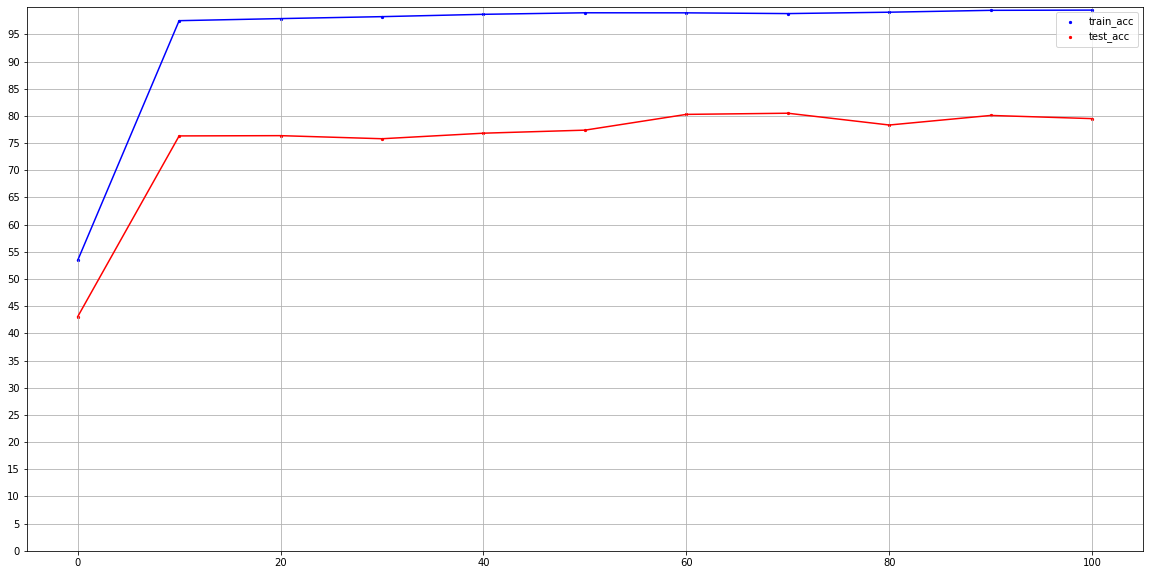

In [21]:
# Draw the learning curve
plt.figure(figsize=(20, 10))
plt.scatter(data=trace, x='epoch', y='train_acc', c="b", s=5)
plt.scatter(data=trace, x='epoch', y='test_acc', c="r", s=5)
plt.plot(trace['epoch'], trace['train_acc'], c="b")
plt.plot(trace['epoch'], trace['test_acc'], c="r")
plt.ylim((0, 100))
plt.yticks(np.arange(0, 100, 5))
plt.grid()
plt.legend()
plt.savefig("learning_curve.eps", format="eps", bbox_inches='tight')

# Loading the best weights and displaying the best model's performances
model.load_state_dict(best_model_weights)
stat_model(model, x_train, y_train, x_test, y_test)

In [22]:
torch.save(model.state_dict(), "./model.pytorch")
model.load_state_dict(torch.load("./model.pytorch"))

<All keys matched successfully>

In [23]:
adv_feat_stats = pd.DataFrame(index=df_training.columns[:-1])

adv_results = pd.DataFrame(index=['Accuracy', 
                                  'Mean perturbed features   [Mean L0]', 
                                  'Max perturbed features    [Max  L0]', 
                                  'Mean Euclidiant distance  [Mean L2]', 
                                  'Max Euclidiant distance   [Max  L2]', 
                                  'Mean Maximum perturbation [Mean Li]', 
                                  'Max Maximum perturbation  [Max  Li]'])

adv_inv = pd.DataFrame(index=['Invalid value range',
                              'Invalid binary values',
                              'Invalid class belonging'])

In [24]:
def adv_norms(x_test_cpu, adversarial_examples_cpu):
    mean_l0 = np.mean(np.sum(x_test_cpu != adversarial_examples_cpu, axis=1))
    max_l0 = np.max(np.sum(x_test_cpu != adversarial_examples_cpu, axis=1))
    mean_l2 = np.mean(np.sum(np.power(x_test_cpu - adversarial_examples_cpu, 2), axis=1, keepdims=True))
    max_l2 = np.max(np.sum(np.power(x_test_cpu - adversarial_examples_cpu, 2), axis=1, keepdims=True))
    mean_li = np.mean(np.max(np.abs(x_test_cpu - adversarial_examples_cpu), axis=1, keepdims=True))
    max_li = np.max(np.max(np.abs(x_test_cpu - adversarial_examples_cpu), axis=1, keepdims=True))
    return [mean_l0, max_l0, mean_l2, max_l2, mean_li, max_li]

In [25]:
data.columns

Index(['1 Duration', '2 Protocol-type : udp', '2 Protocol-type : tcp',
       '2 Protocol-type : icmp', '3 Service : whois', '3 Service : vmnet',
       '3 Service : uucp_path', '3 Service : uucp', '3 Service : urp_i',
       '3 Service : urh_i',
       ...
       '33 Dst-host-srv-count', '34 Dst-host-same-srv-rate',
       '35 Dst-host-diff-srv-rate', '36 Dst-host-same-src-port-rate',
       '37 Dst-host-srv-diff-host-rate', '38 Dst-host-serror-rate',
       '39 Dst-host-srv-serror-rate', '40 Dst-host-rerror-rate',
       '41 Dst-host-srv-rerror-rate', '42 Labels'],
      dtype='object', length=122)

In [30]:
def adv_criteria(x_test_cpu, adversarial_examples_cpu):
    # Verify value ranges
    min = x_test_cpu.min(axis=1, keepdims=True)
    max = x_test_cpu.max(axis=1, keepdims=True)
    adv_range = (adversarial_examples_cpu < min) | (adversarial_examples_cpu > max)
    adv_range = adv_range.any(axis=1, keepdims=True)
    adv_range = adv_range.sum(axis=0)

    # Binary values
    binary_feat_ind =  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 87, 92, 94, 100, 101]#[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 27, 29, 30, 31, 32, 33, 70, 72, 73, 74, 75, 76, 77]
    adv_bin = adversarial_examples_cpu[:, binary_feat_ind]
    adv_bin = (adv_bin != 1) & ( adv_bin != 0)
    adv_bin = adv_bin.any(axis=1, keepdims=True)
    adv_bin = adv_bin.sum(axis=0)

    # Multi class
    adv1 = adversarial_examples_cpu[:, 1:4] != 0
    adv1 = adv1.astype(int).sum(axis=1, keepdims=True) != 1
    adv1 = adv1.sum(axis=1, keepdims=True)

    adv2 = adversarial_examples_cpu[:, 4:74] != 0
    adv2 = adv2.astype(int).sum(axis=1, keepdims=True) != 1
    adv2 = adv2.sum(axis=1, keepdims=True)

    adv3 = adversarial_examples_cpu[:, 74:85] != 0
    adv3 = adv3.astype(int).sum(axis=1, keepdims=True) != 1
    adv3 = adv3.sum(axis=1, keepdims=True)

    adv_cat = adv1 | adv2 | adv3
    adv_cat = adv_cat.sum(axis=0)

    return [adv_range[0]*100/x_test.shape[0], adv_bin[0]*100/x_test.shape[0], adv_cat[0]*100/x_test.shape[0]]

In [31]:
positive_examples = df_testing[df_testing['42 Labels'] == 1].values
x_test = torch.from_numpy((positive_examples[:, :-1])).float()
y_test = torch.from_numpy((positive_examples[:, -1])).float()
x_test = x_test.to(device)
y_test = y_test.to(device)

In [32]:
classifier = PyTorchClassifier(model=model, loss=criterion, optimizer=optimizer, input_shape=input_size, nb_classes=output_size)

In [33]:
_, predictions_clean = model(x_test, softmax=True).max(dim=1)
accuracy_clean = evaluate(predictions=predictions_clean.long(), real=y_test)

attack='Clean'

# Exporting the clean positive examples in a .csv file
pd.DataFrame(np.hstack((x_test.cpu().numpy(),y_test.cpu().numpy().reshape(y_test.shape[0], 1))), columns=data.columns).to_csv("clean_examples.csv")

x_test_cpu = np.array(x_test.cpu())
adv_results[attack] = [accuracy_clean] + adv_norms(x_test_cpu, x_test_cpu)
adv_inv[attack] = adv_criteria(x_test_cpu, x_test_cpu)

print(adv_results[attack])
print(adv_inv[attack])

Accuracy                               69.079716
Mean perturbed features   [Mean L0]     0.000000
Max perturbed features    [Max  L0]     0.000000
Mean Euclidiant distance  [Mean L2]     0.000000
Max Euclidiant distance   [Max  L2]     0.000000
Mean Maximum perturbation [Mean Li]     0.000000
Max Maximum perturbation  [Max  Li]     0.000000
Name: Clean, dtype: float64
Invalid value range        0.0
Invalid binary values      0.0
Invalid class belonging    0.0
Name: Clean, dtype: float64


In [34]:
binary_cols = []
for col in data.columns:
    if data[col].dropna().isin([0, 1]).all():
        binary_cols.append(col)

# Get the index positions of the binary columns
binary_cols_index = [data.columns.get_loc(col) for col in binary_cols]

# Print the binary columns and their index positions
print("Binary columns: ", binary_cols)
print("Index positions of binary columns: ", binary_cols_index)

Binary columns:  ['2 Protocol-type : udp', '2 Protocol-type : tcp', '2 Protocol-type : icmp', '3 Service : whois', '3 Service : vmnet', '3 Service : uucp_path', '3 Service : uucp', '3 Service : urp_i', '3 Service : urh_i', '3 Service : time', '3 Service : tim_i', '3 Service : tftp_u', '3 Service : telnet', '3 Service : systat', '3 Service : supdup', '3 Service : sunrpc', '3 Service : ssh', '3 Service : sql_net', '3 Service : smtp', '3 Service : shell', '3 Service : rje', '3 Service : remote_job', '3 Service : red_i', '3 Service : private', '3 Service : printer', '3 Service : pop_3', '3 Service : pop_2', '3 Service : pm_dump', '3 Service : other', '3 Service : ntp_u', '3 Service : nntp', '3 Service : nnsp', '3 Service : netstat', '3 Service : netbios_ssn', '3 Service : netbios_ns', '3 Service : netbios_dgm', '3 Service : name', '3 Service : mtp', '3 Service : login', '3 Service : link', '3 Service : ldap', '3 Service : kshell', '3 Service : klogin', '3 Service : iso_tsap', '3 Service : 

In [35]:
import numpy as np
import torch
import pandas as pd

# Assuming 'x_test', 'model', 'classifier', and 'y_test' are already defined and loaded
# Assuming 'data' is a DataFrame containing your entire dataset (training + testing)

# Calculate min and max values for each feature from the entire dataset
feature_data = data.iloc[:, :-1]  # Adjust this to match your actual feature columns

feature_min = feature_data.min()
feature_max = feature_data.max()

# Create the adversarial examples crafter
adversarial_crafter = FastGradientMethod(
    classifier,
    norm=np.inf,
    eps=0.1,
    targeted=False,
    num_random_init=0,
    batch_size=128,
)

# Generate the adversarial examples
adversarial_examples = adversarial_crafter.generate(x=x_test.cpu())

# Convert adversarial examples to torch tensors
adversarial_examples = torch.from_numpy(adversarial_examples).float()

# Ensure the perturbation for each feature stays within the observed min-max range
for i, (min_val, max_val) in enumerate(zip(feature_min, feature_max)):
    adversarial_examples[:, i] = torch.clamp(adversarial_examples[:, i], min=min_val, max=max_val)

adversarial_examples = adversarial_examples.to(torch.device('cuda' if torch.cuda.is_available() else 'cpu'))

# Continue with the evaluation and processing
stat_model(model, x_test, y_test, adversarial_examples, y_test)

# Convert to CPU numpy arrays for further analysis
adversarial_examples_cpu = np.array(adversarial_examples.cpu())
x_test_cpu = np.array(x_test.cpu())

# Evaluate the model on adversarial examples
_, predictions_adv = model(adversarial_examples, softmax=True).max(dim=1)
accuracy_adv = evaluate(predictions=predictions_adv.long(), real=y_test)
attack = 'FGSM'
adv_results[attack] = [accuracy_adv] + adv_norms(x_test_cpu, adversarial_examples_cpu)
adv_inv[attack] = adv_criteria(x_test_cpu, adversarial_examples_cpu)

# Export the adjusted adversarial examples to a CSV file
pd.DataFrame(np.hstack((adversarial_examples_cpu, y_test.cpu().reshape(y_test.shape[0], 1))), columns=data.columns).to_csv("adjusted_adversarial_examples_FGSM-KDD.csv")

print(adv_results[attack])
print(adv_inv[attack])


Final Training Accuracy: 69.0797%
Final Testing Accuracy : 41.5180%
Classification Report :
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.42      0.59     12833

    accuracy                           0.42     12833
   macro avg       0.50      0.21      0.29     12833
weighted avg       1.00      0.42      0.59     12833



C:\Users\Juba\.conda\envs\py3.6\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Juba\.conda\envs\py3.6\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Juba\.conda\envs\py3.6\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy                               41.517962
Mean perturbed features   [Mean L0]    58.733655
Max perturbed features    [Max  L0]    93.000000
Mean Euclidiant distance  [Mean L2]     0.564629
Max Euclidiant distance   [Max  L2]     0.909999
Mean Maximum perturbation [Mean Li]     0.100000
Max Maximum perturbation  [Max  Li]     0.100000
Name: FGSM, dtype: float64
Invalid value range          0.007792
Invalid binary values      100.000000
Invalid class belonging    100.000000
Name: FGSM, dtype: float64


In [40]:
import pandas as pd

# Load the datasets
data_x1 = pd.read_csv('clean_examples.csv')  # Original dataset
data_x2 = pd.read_csv('adjusted_adversarial_examples_FGSM-KDD.csv')  # Perturbed dataset
# List of columns to keep in x2
columns_to_keep = [
    '1 Duration', '5 Src-bytes', '6 Dst-bytes', '8 Wrong-fragment', '9 Urgent',
    '10 Hot', '11 Num-failed-logins', '13 Num-compromised', '15 Su-attempted',
    '16 Num-root', '17 Num-file-creations', '18 Num-shells', '19 Num-access-files',
    '23 Count', '24 Srv-count', '25 Serror-rate', '26 Srv-serror-rate', '27 Rerror-rate',
    '28 Srv-rerror-rate', '29 Same-srv-rate', '30 Diff-srv-rate', '31 Srv-diff-host-rate',
    '32 Dst-host-count', '33 Dst-host-srv-count', '34 Dst-host-same-srv-rate',
    '35 Dst-host-diff-srv-rate', '36 Dst-host-same-src-port-rate', '37 Dst-host-srv-diff-host-rate',
    '38 Dst-host-serror-rate', '39 Dst-host-srv-serror-rate', '40 Dst-host-rerror-rate',
    '41 Dst-host-srv-rerror-rate'
]

# Ensure column names are consistent and exist in both dataframes
columns_to_keep = [col for col in columns_to_keep if col in data_x2.columns and col in data_x1.columns]

# Columns to replace in x2 with values from x1 (all columns not in 'columns_to_keep')
columns_to_replace = [col for col in data_x2.columns if col not in columns_to_keep]

# Replace the values
data_x2[columns_to_replace] = data_x1[columns_to_replace]
# Save the modified x2 dataset
data_x2.to_csv('modified_x2.csv', index=False)


In [41]:
import numpy as np
import torch
import pandas as pd

# Assuming 'x_test', 'model', 'classifier', and 'y_test' are already defined and loaded
# Assuming 'data' is a DataFrame containing your entire dataset (training + testing)

# Calculate min and max values for each feature from the entire dataset
feature_data = data.iloc[:, :-1]  # Adjust this to match your actual feature columns

feature_min = feature_data.min()
feature_max = feature_data.max()

# Create the adversarial examples crafter
adversarial_crafter = BasicIterativeMethod(classifier, 
                                           eps=0.1, 
                                           eps_step=0.001,
                                           max_iter=100, 
                                           targeted=False, 
                                           batch_size=128)

# Generate the adversarial examples
adversarial_examples = adversarial_crafter.generate(x=x_test.cpu())

# Convert adversarial examples to torch tensors
adversarial_examples = torch.from_numpy(adversarial_examples).float()

# Ensure the perturbation for each feature stays within the observed min-max range
for i, (min_val, max_val) in enumerate(zip(feature_min, feature_max)):
    adversarial_examples[:, i] = torch.clamp(adversarial_examples[:, i], min=min_val, max=max_val)

adversarial_examples = adversarial_examples.to(torch.device('cuda' if torch.cuda.is_available() else 'cpu'))

# Continue with the evaluation and processing
stat_model(model, x_test, y_test, adversarial_examples, y_test)

# Convert to CPU numpy arrays for further analysis
adversarial_examples_cpu = np.array(adversarial_examples.cpu())
x_test_cpu = np.array(x_test.cpu())

# Evaluate the model on adversarial examples
_, predictions_adv = model(adversarial_examples, softmax=True).max(dim=1)
accuracy_adv = evaluate(predictions=predictions_adv.long(), real=y_test)
attack = 'BIM'
adv_results[attack] = [accuracy_adv] + adv_norms(x_test_cpu, adversarial_examples_cpu)
adv_inv[attack] = adv_criteria(x_test_cpu, adversarial_examples_cpu)

# Export the adjusted adversarial examples to a CSV file
pd.DataFrame(np.hstack((adversarial_examples_cpu, y_test.cpu().reshape(y_test.shape[0], 1))), columns=data.columns).to_csv("adjusted_adversarial_examples_BIM-KDD.csv")

print(adv_results[attack])
print(adv_inv[attack])


Final Training Accuracy: 69.0797%
Final Testing Accuracy : 42.5621%
Classification Report :
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.43      0.60     12833

    accuracy                           0.43     12833
   macro avg       0.50      0.21      0.30     12833
weighted avg       1.00      0.43      0.60     12833



C:\Users\Juba\.conda\envs\py3.6\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Juba\.conda\envs\py3.6\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Juba\.conda\envs\py3.6\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy                               42.562144
Mean perturbed features   [Mean L0]    57.634770
Max perturbed features    [Max  L0]    90.000000
Mean Euclidiant distance  [Mean L2]     0.456023
Max Euclidiant distance   [Max  L2]     0.803989
Mean Maximum perturbation [Mean Li]     0.100000
Max Maximum perturbation  [Max  Li]     0.100000
Name: BIM, dtype: float64
Invalid value range          0.023377
Invalid binary values      100.000000
Invalid class belonging    100.000000
Name: BIM, dtype: float64


In [42]:
import pandas as pd

# Load the datasets
data_x1 = pd.read_csv('clean_examples.csv')  # Original dataset
data_x2 = pd.read_csv('adjusted_adversarial_examples_BIM-KDD.csv')  # Perturbed dataset
# List of columns to keep in x2
columns_to_keep = [
    '1 Duration', '5 Src-bytes', '6 Dst-bytes', '8 Wrong-fragment', '9 Urgent',
    '10 Hot', '11 Num-failed-logins', '13 Num-compromised', '15 Su-attempted',
    '16 Num-root', '17 Num-file-creations', '18 Num-shells', '19 Num-access-files',
    '23 Count', '24 Srv-count', '25 Serror-rate', '26 Srv-serror-rate', '27 Rerror-rate',
    '28 Srv-rerror-rate', '29 Same-srv-rate', '30 Diff-srv-rate', '31 Srv-diff-host-rate',
    '32 Dst-host-count', '33 Dst-host-srv-count', '34 Dst-host-same-srv-rate',
    '35 Dst-host-diff-srv-rate', '36 Dst-host-same-src-port-rate', '37 Dst-host-srv-diff-host-rate',
    '38 Dst-host-serror-rate', '39 Dst-host-srv-serror-rate', '40 Dst-host-rerror-rate',
    '41 Dst-host-srv-rerror-rate'
]

# Ensure column names are consistent and exist in both dataframes
columns_to_keep = [col for col in columns_to_keep if col in data_x2.columns and col in data_x1.columns]

# Columns to replace in x2 with values from x1 (all columns not in 'columns_to_keep')
columns_to_replace = [col for col in data_x2.columns if col not in columns_to_keep]

# Replace the values
data_x2[columns_to_replace] = data_x1[columns_to_replace]
# Save the modified x2 dataset
data_x2.to_csv('modified_x2.csv', index=False)


Final Training Accuracy: 99.9467%
Final Testing Accuracy : 0.2085%
Classification Report :
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.00      0.00     41243

    accuracy                           0.00     41243
   macro avg       0.50      0.00      0.00     41243
weighted avg       1.00      0.00      0.00     41243



C:\Users\Juba\.conda\envs\py3.6\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Juba\.conda\envs\py3.6\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Juba\.conda\envs\py3.6\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy                                 0.208520
Mean perturbed features   [Mean L0]     97.358437
Max perturbed features    [Max  L0]    100.000000
Mean Euclidiant distance  [Mean L2]      0.661638
Max Euclidiant distance   [Max  L2]      0.963897
Mean Maximum perturbation [Mean Li]      0.099918
Max Maximum perturbation  [Max  Li]      0.100000
Name: FGSM, dtype: float64
Invalid value range         99.292001
Invalid binary values        0.000000
Invalid class belonging    100.000000
Name: FGSM, dtype: float64


In [43]:
import numpy as np
import torch
import pandas as pd

# Assuming 'x_test', 'model', 'classifier', and 'y_test' are already defined and loaded
# Assuming 'data' is a DataFrame containing your entire dataset (training + testing)

# Calculate min and max values for each feature from the entire dataset
feature_data = data.iloc[:, :-1]  # Adjust this to match your actual feature columns

feature_min = feature_data.min()
feature_max = feature_data.max()

# Create the adversarial examples crafter
# Creating the adversarial examples crafter
adversarial_crafter = DeepFool(classifier, 
                               max_iter=100, 
                               epsilon=1e-6, 
                               nb_grads=10, 
                               batch_size=128)

# Generate the adversarial examples
adversarial_examples = adversarial_crafter.generate(x=x_test.cpu())

# Convert adversarial examples to torch tensors
adversarial_examples = torch.from_numpy(adversarial_examples).float()

# Ensure the perturbation for each feature stays within the observed min-max range
for i, (min_val, max_val) in enumerate(zip(feature_min, feature_max)):
    adversarial_examples[:, i] = torch.clamp(adversarial_examples[:, i], min=min_val, max=max_val)

adversarial_examples = adversarial_examples.to(torch.device('cuda' if torch.cuda.is_available() else 'cpu'))

# Continue with the evaluation and processing
stat_model(model, x_test, y_test, adversarial_examples, y_test)

# Convert to CPU numpy arrays for further analysis
adversarial_examples_cpu = np.array(adversarial_examples.cpu())
x_test_cpu = np.array(x_test.cpu())

# Evaluate the model on adversarial examples
_, predictions_adv = model(adversarial_examples, softmax=True).max(dim=1)
accuracy_adv = evaluate(predictions=predictions_adv.long(), real=y_test)
attack = 'DF'
adv_results[attack] = [accuracy_adv] + adv_norms(x_test_cpu, adversarial_examples_cpu)
adv_inv[attack] = adv_criteria(x_test_cpu, adversarial_examples_cpu)

# Export the adjusted adversarial examples to a CSV file
pd.DataFrame(np.hstack((adversarial_examples_cpu, y_test.cpu().reshape(y_test.shape[0], 1))), columns=data.columns).to_csv("adjusted_adversarial_examples_DF-KDD.csv")

print(adv_results[attack])
print(adv_inv[attack])


DeepFool: 100%|██████████████████████████████████████████████████████████████████████| 101/101 [01:08<00:00,  1.49it/s]


Final Training Accuracy: 69.0797%
Final Testing Accuracy : 69.1654%
Classification Report :
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.69      0.82     12833

    accuracy                           0.69     12833
   macro avg       0.50      0.35      0.41     12833
weighted avg       1.00      0.69      0.82     12833



C:\Users\Juba\.conda\envs\py3.6\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Juba\.conda\envs\py3.6\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Juba\.conda\envs\py3.6\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy                               69.165433
Mean perturbed features   [Mean L0]    58.754227
Max perturbed features    [Max  L0]    93.000000
Mean Euclidiant distance  [Mean L2]     0.009717
Max Euclidiant distance   [Max  L2]     0.084135
Mean Maximum perturbation [Mean Li]     0.042677
Max Maximum perturbation  [Max  Li]     0.143524
Name: DF, dtype: float64
Invalid value range          0.007792
Invalid binary values      100.000000
Invalid class belonging    100.000000
Name: DF, dtype: float64


In [44]:
import pandas as pd

# Load the datasets
data_x1 = pd.read_csv('clean_examples.csv')  # Original dataset
data_x2 = pd.read_csv('adjusted_adversarial_examples_DF-KDD.csv')  # Perturbed dataset
# List of columns to keep in x2
columns_to_keep = [
    '1 Duration', '5 Src-bytes', '6 Dst-bytes', '8 Wrong-fragment', '9 Urgent',
    '10 Hot', '11 Num-failed-logins', '13 Num-compromised', '15 Su-attempted',
    '16 Num-root', '17 Num-file-creations', '18 Num-shells', '19 Num-access-files',
    '23 Count', '24 Srv-count', '25 Serror-rate', '26 Srv-serror-rate', '27 Rerror-rate',
    '28 Srv-rerror-rate', '29 Same-srv-rate', '30 Diff-srv-rate', '31 Srv-diff-host-rate',
    '32 Dst-host-count', '33 Dst-host-srv-count', '34 Dst-host-same-srv-rate',
    '35 Dst-host-diff-srv-rate', '36 Dst-host-same-src-port-rate', '37 Dst-host-srv-diff-host-rate',
    '38 Dst-host-serror-rate', '39 Dst-host-srv-serror-rate', '40 Dst-host-rerror-rate',
    '41 Dst-host-srv-rerror-rate'
]

# Ensure column names are consistent and exist in both dataframes
columns_to_keep = [col for col in columns_to_keep if col in data_x2.columns and col in data_x1.columns]

# Columns to replace in x2 with values from x1 (all columns not in 'columns_to_keep')
columns_to_replace = [col for col in data_x2.columns if col not in columns_to_keep]

# Replace the values
data_x2[columns_to_replace] = data_x1[columns_to_replace]
# Save the modified x2 dataset
data_x2.to_csv('modified_x2.csv', index=False)


In [45]:
import numpy as np
import torch
import pandas as pd

# Assuming 'x_test', 'model', 'classifier', and 'y_test' are already defined and loaded
# Assuming 'data' is a DataFrame containing your entire dataset (training + testing)

# Calculate min and max values for each feature from the entire dataset
feature_data = data.iloc[:, :-1]  # Adjust this to match your actual feature columns

feature_min = feature_data.min()
feature_max = feature_data.max()

# Create the adversarial examples crafter
# Creating the adversarial examples crafter
adversarial_crafter = SaliencyMapMethod(classifier,
                                        theta = 0.1,
                                        gamma = 1.0,
                                        batch_size=128)

# Generate the adversarial examples
adversarial_examples = adversarial_crafter.generate(x=x_test.cpu())

# Convert adversarial examples to torch tensors
adversarial_examples = torch.from_numpy(adversarial_examples).float()

# Ensure the perturbation for each feature stays within the observed min-max range
for i, (min_val, max_val) in enumerate(zip(feature_min, feature_max)):
    adversarial_examples[:, i] = torch.clamp(adversarial_examples[:, i], min=min_val, max=max_val)

adversarial_examples = adversarial_examples.to(torch.device('cuda' if torch.cuda.is_available() else 'cpu'))

# Continue with the evaluation and processing
stat_model(model, x_test, y_test, adversarial_examples, y_test)

# Convert to CPU numpy arrays for further analysis
adversarial_examples_cpu = np.array(adversarial_examples.cpu())
x_test_cpu = np.array(x_test.cpu())

# Evaluate the model on adversarial examples
_, predictions_adv = model(adversarial_examples, softmax=True).max(dim=1)
accuracy_adv = evaluate(predictions=predictions_adv.long(), real=y_test)
attack = 'JSMA'
adv_results[attack] = [accuracy_adv] + adv_norms(x_test_cpu, adversarial_examples_cpu)
adv_inv[attack] = adv_criteria(x_test_cpu, adversarial_examples_cpu)

# Export the adjusted adversarial examples to a CSV file
pd.DataFrame(np.hstack((adversarial_examples_cpu, y_test.cpu().reshape(y_test.shape[0], 1))), columns=data.columns).to_csv("adjusted_adversarial_examples_JSMA-KDD.csv")

print(adv_results[attack])
print(adv_inv[attack])


JSMA: 100%|██████████████████████████████████████████████████████████████████████████| 101/101 [00:03<00:00, 25.39it/s]


Final Training Accuracy: 69.0797%
Final Testing Accuracy : 30.9203%
Classification Report :
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.31      0.47     12833

    accuracy                           0.31     12833
   macro avg       0.50      0.15      0.24     12833
weighted avg       1.00      0.31      0.47     12833



C:\Users\Juba\.conda\envs\py3.6\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Juba\.conda\envs\py3.6\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Juba\.conda\envs\py3.6\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy                               30.920284
Mean perturbed features   [Mean L0]     2.087820
Max perturbed features    [Max  L0]     3.000000
Mean Euclidiant distance  [Mean L2]     0.223912
Max Euclidiant distance   [Max  L2]     1.280000
Mean Maximum perturbation [Mean Li]     0.286542
Max Maximum perturbation  [Max  Li]     0.800000
Name: JSMA, dtype: float64
Invalid value range         0.000000
Invalid binary values      44.019325
Invalid class belonging    44.019325
Name: JSMA, dtype: float64


In [47]:
import pandas as pd

# Load the datasets
data_x1 = pd.read_csv('clean_examples.csv')  # Original dataset
data_x2 = pd.read_csv('adjusted_adversarial_examples_JSMA-KDD.csv')  # Perturbed dataset
# List of columns to keep in x2
columns_to_keep = [
    '1 Duration', '5 Src-bytes', '6 Dst-bytes', '8 Wrong-fragment', '9 Urgent',
    '10 Hot', '11 Num-failed-logins', '13 Num-compromised', '15 Su-attempted',
    '16 Num-root', '17 Num-file-creations', '18 Num-shells', '19 Num-access-files',
    '23 Count', '24 Srv-count', '25 Serror-rate', '26 Srv-serror-rate', '27 Rerror-rate',
    '28 Srv-rerror-rate', '29 Same-srv-rate', '30 Diff-srv-rate', '31 Srv-diff-host-rate',
    '32 Dst-host-count', '33 Dst-host-srv-count', '34 Dst-host-same-srv-rate',
    '35 Dst-host-diff-srv-rate', '36 Dst-host-same-src-port-rate', '37 Dst-host-srv-diff-host-rate',
    '38 Dst-host-serror-rate', '39 Dst-host-srv-serror-rate', '40 Dst-host-rerror-rate',
    '41 Dst-host-srv-rerror-rate'
]

# Ensure column names are consistent and exist in both dataframes
columns_to_keep = [col for col in columns_to_keep if col in data_x2.columns and col in data_x1.columns]

# Columns to replace in x2 with values from x1 (all columns not in 'columns_to_keep')
columns_to_replace = [col for col in data_x2.columns if col not in columns_to_keep]

# Replace the values
data_x2[columns_to_replace] = data_x1[columns_to_replace]
# Save the modified x2 dataset
data_x2.to_csv('modified_x2.csv', index=False)


In [48]:
import numpy as np
import torch
import pandas as pd

# Assuming 'x_test', 'model', 'classifier', and 'y_test' are already defined and loaded
# Assuming 'data' is a DataFrame containing your entire dataset (training + testing)

# Calculate min and max values for each feature from the entire dataset
feature_data = data.iloc[:, :-1]  # Adjust this to match your actual feature columns

feature_min = feature_data.min()
feature_max = feature_data.max()

# Create the adversarial examples crafter
# Creating the adversarial examples crafter
# Creating the adversarial examples crafter
adversarial_crafter = CarliniL2Method(classifier,
                                      confidence=0.0,
                                      targeted=False,
                                      learning_rate=0.01,
                                      binary_search_steps=10,
                                      max_iter=10,
                                      initial_const=0.01,
                                      max_halving=5,
                                      max_doubling=5,
                                      batch_size=128)

# Generate the adversarial examples
adversarial_examples = adversarial_crafter.generate(x=x_test.cpu())

# Convert adversarial examples to torch tensors
adversarial_examples = torch.from_numpy(adversarial_examples).float()

# Ensure the perturbation for each feature stays within the observed min-max range
for i, (min_val, max_val) in enumerate(zip(feature_min, feature_max)):
    adversarial_examples[:, i] = torch.clamp(adversarial_examples[:, i], min=min_val, max=max_val)

adversarial_examples = adversarial_examples.to(torch.device('cuda' if torch.cuda.is_available() else 'cpu'))

# Continue with the evaluation and processing
stat_model(model, x_test, y_test, adversarial_examples, y_test)

# Convert to CPU numpy arrays for further analysis
adversarial_examples_cpu = np.array(adversarial_examples.cpu())
x_test_cpu = np.array(x_test.cpu())

# Evaluate the model on adversarial examples
_, predictions_adv = model(adversarial_examples, softmax=True).max(dim=1)
accuracy_adv = evaluate(predictions=predictions_adv.long(), real=y_test)
attack = 'CW2'
adv_results[attack] = [accuracy_adv] + adv_norms(x_test_cpu, adversarial_examples_cpu)
adv_inv[attack] = adv_criteria(x_test_cpu, adversarial_examples_cpu)

# Export the adjusted adversarial examples to a CSV file
pd.DataFrame(np.hstack((adversarial_examples_cpu, y_test.cpu().reshape(y_test.shape[0], 1))), columns=data.columns).to_csv("adjusted_adversarial_examples_CW2.csv")

print(adv_results[attack])
print(adv_inv[attack])


C&W L_2: 100%|███████████████████████████████████████████████████████████████████████| 101/101 [04:05<00:00,  2.43s/it]


Final Training Accuracy: 69.0797%
Final Testing Accuracy : 61.8172%
Classification Report :
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.62      0.76     12833

    accuracy                           0.62     12833
   macro avg       0.50      0.31      0.38     12833
weighted avg       1.00      0.62      0.76     12833



C:\Users\Juba\.conda\envs\py3.6\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Juba\.conda\envs\py3.6\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Juba\.conda\envs\py3.6\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy                                61.817190
Mean perturbed features   [Mean L0]    118.509468
Max perturbed features    [Max  L0]    121.000000
Mean Euclidiant distance  [Mean L2]      1.212284
Max Euclidiant distance   [Max  L2]      7.401898
Mean Maximum perturbation [Mean Li]      0.528034
Max Maximum perturbation  [Max  Li]      1.000000
Name: CW2, dtype: float64
Invalid value range          0.007792
Invalid binary values      100.000000
Invalid class belonging    100.000000
Name: CW2, dtype: float64


In [49]:
import pandas as pd

# Load the datasets
data_x1 = pd.read_csv('clean_examples.csv')  # Original dataset
data_x2 = pd.read_csv('adjusted_adversarial_examples_CW2.csv')  # Perturbed dataset
# List of columns to keep in x2
columns_to_keep = [
    '1 Duration', '5 Src-bytes', '6 Dst-bytes', '8 Wrong-fragment', '9 Urgent',
    '10 Hot', '11 Num-failed-logins', '13 Num-compromised', '15 Su-attempted',
    '16 Num-root', '17 Num-file-creations', '18 Num-shells', '19 Num-access-files',
    '23 Count', '24 Srv-count', '25 Serror-rate', '26 Srv-serror-rate', '27 Rerror-rate',
    '28 Srv-rerror-rate', '29 Same-srv-rate', '30 Diff-srv-rate', '31 Srv-diff-host-rate',
    '32 Dst-host-count', '33 Dst-host-srv-count', '34 Dst-host-same-srv-rate',
    '35 Dst-host-diff-srv-rate', '36 Dst-host-same-src-port-rate', '37 Dst-host-srv-diff-host-rate',
    '38 Dst-host-serror-rate', '39 Dst-host-srv-serror-rate', '40 Dst-host-rerror-rate',
    '41 Dst-host-srv-rerror-rate'
]

# Ensure column names are consistent and exist in both dataframes
columns_to_keep = [col for col in columns_to_keep if col in data_x2.columns and col in data_x1.columns]

# Columns to replace in x2 with values from x1 (all columns not in 'columns_to_keep')
columns_to_replace = [col for col in data_x2.columns if col not in columns_to_keep]

# Replace the values
data_x2[columns_to_replace] = data_x1[columns_to_replace]
# Save the modified x2 dataset
data_x2.to_csv('modified_x2.csv', index=False)


In [50]:
import numpy as np
import torch
import pandas as pd

# Assuming 'x_test', 'model', 'classifier', and 'y_test' are already defined and loaded
# Assuming 'data' is a DataFrame containing your entire dataset (training + testing)

# Calculate min and max values for each feature from the entire dataset
feature_data = data.iloc[:, :-1]  # Adjust this to match your actual feature columns

feature_min = feature_data.min()
feature_max = feature_data.max()

# Create the adversarial examples crafter
# Creating the adversarial examples crafter
# Creating the adversarial examples crafter
adversarial_crafter = CarliniLInfMethod(classifier,
                                        confidence=0.0,
                                        targeted=False,
                                        learning_rate=0.01,
                                        max_iter=10,
                                        max_halving=5,
                                        max_doubling=5,
                                        eps=0.1,
                                        batch_size=128)

# Generate the adversarial examples
adversarial_examples = adversarial_crafter.generate(x=x_test.cpu())

# Convert adversarial examples to torch tensors
adversarial_examples = torch.from_numpy(adversarial_examples).float()

# Ensure the perturbation for each feature stays within the observed min-max range
for i, (min_val, max_val) in enumerate(zip(feature_min, feature_max)):
    adversarial_examples[:, i] = torch.clamp(adversarial_examples[:, i], min=min_val, max=max_val)

adversarial_examples = adversarial_examples.to(torch.device('cuda' if torch.cuda.is_available() else 'cpu'))

# Continue with the evaluation and processing
stat_model(model, x_test, y_test, adversarial_examples, y_test)

# Convert to CPU numpy arrays for further analysis
adversarial_examples_cpu = np.array(adversarial_examples.cpu())
x_test_cpu = np.array(x_test.cpu())

# Evaluate the model on adversarial examples
_, predictions_adv = model(adversarial_examples, softmax=True).max(dim=1)
accuracy_adv = evaluate(predictions=predictions_adv.long(), real=y_test)
attack = 'CWinf'
adv_results[attack] = [accuracy_adv] + adv_norms(x_test_cpu, adversarial_examples_cpu)
adv_inv[attack] = adv_criteria(x_test_cpu, adversarial_examples_cpu)

# Export the adjusted adversarial examples to a CSV file
pd.DataFrame(np.hstack((adversarial_examples_cpu, y_test.cpu().reshape(y_test.shape[0], 1))), columns=data.columns).to_csv("adjusted_adversarial_examples_CWinf-KDD.csv")

print(adv_results[attack])
print(adv_inv[attack])


C&W L_inf: 100%|█████████████████████████████████████████████████████████████████████| 101/101 [00:37<00:00,  2.72it/s]


Final Training Accuracy: 69.0797%
Final Testing Accuracy : 48.0324%
Classification Report :
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.48      0.65     12833

    accuracy                           0.48     12833
   macro avg       0.50      0.24      0.32     12833
weighted avg       1.00      0.48      0.65     12833



C:\Users\Juba\.conda\envs\py3.6\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Juba\.conda\envs\py3.6\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Juba\.conda\envs\py3.6\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy                                48.032416
Mean perturbed features   [Mean L0]     82.099665
Max perturbed features    [Max  L0]    121.000000
Mean Euclidiant distance  [Mean L2]      0.116756
Max Euclidiant distance   [Max  L2]      0.520288
Mean Maximum perturbation [Mean Li]      0.073765
Max Maximum perturbation  [Max  Li]      0.100000
Name: CWinf, dtype: float64
Invalid value range         0.007792
Invalid binary values      80.191693
Invalid class belonging    80.191693
Name: CWinf, dtype: float64


In [51]:
import pandas as pd

# Load the datasets
data_x1 = pd.read_csv('clean_examples.csv')  # Original dataset
data_x2 = pd.read_csv('adjusted_adversarial_examples_CW2.csv')  # Perturbed dataset
# List of columns to keep in x2
columns_to_keep = [
    '1 Duration', '5 Src-bytes', '6 Dst-bytes', '8 Wrong-fragment', '9 Urgent',
    '10 Hot', '11 Num-failed-logins', '13 Num-compromised', '15 Su-attempted',
    '16 Num-root', '17 Num-file-creations', '18 Num-shells', '19 Num-access-files',
    '23 Count', '24 Srv-count', '25 Serror-rate', '26 Srv-serror-rate', '27 Rerror-rate',
    '28 Srv-rerror-rate', '29 Same-srv-rate', '30 Diff-srv-rate', '31 Srv-diff-host-rate',
    '32 Dst-host-count', '33 Dst-host-srv-count', '34 Dst-host-same-srv-rate',
    '35 Dst-host-diff-srv-rate', '36 Dst-host-same-src-port-rate', '37 Dst-host-srv-diff-host-rate',
    '38 Dst-host-serror-rate', '39 Dst-host-srv-serror-rate', '40 Dst-host-rerror-rate',
    '41 Dst-host-srv-rerror-rate'
]

# Ensure column names are consistent and exist in both dataframes
columns_to_keep = [col for col in columns_to_keep if col in data_x2.columns and col in data_x1.columns]

# Columns to replace in x2 with values from x1 (all columns not in 'columns_to_keep')
columns_to_replace = [col for col in data_x2.columns if col not in columns_to_keep]

# Replace the values
data_x2[columns_to_replace] = data_x1[columns_to_replace]
# Save the modified x2 dataset
data_x2.to_csv('modified_x2.csv', index=False)


In [54]:
'''
# Creating the adversarial examples crafter
adversarial_crafter = ElasticNet(classifier,
                                         norm='inf',
                                        
                                         targeted=False,
                                        
                                         batch_size=32,
                                         )

# Generating the adversarial examples
adversarial_examples = adversarial_crafter.generate(x=x_test.cpu())

adversarial_examples = torch.from_numpy(adversarial_examples).float()
adversarial_examples = adversarial_examples.to(torch.device('cuda' if torch.cuda.is_available() else 'cpu'))
stat_model(model, x_test, y_test, adversarial_examples, y_test)

adversarial_examples_cpu = np.array(adversarial_examples.cpu())
x_test_cpu = np.array(x_test.cpu())

_, predictions_adv = model(adversarial_examples, softmax=True).max(dim=1)
accuracy_adv = evaluate(predictions=predictions_adv.long(), real=y_test)
attack = 'Wasserstein'
adv_results[attack] = [accuracy_adv] + adv_norms(x_test_cpu, adversarial_examples_cpu)
adv_inv[attack] = adv_criteria(x_test_cpu, adversarial_examples_cpu)

# Exporting the adversarial examples in a .csv file
pd.DataFrame(np.hstack((adversarial_examples_cpu,y_test.cpu().reshape(y_test.shape[0], 1))), columns=data.columns).to_csv("adversarial_examples_FGSM.csv")

# Saving the statistics in a table
perturbation = np.abs(adversarial_examples_cpu - x_test_cpu)
adv_feat_stats[attack] = ((perturbation > 10e-6).sum(axis=0) / perturbation.shape[0]) * 100

print(adv_results[attack])
print(adv_inv[attack])'''

'\n# Creating the adversarial examples crafter\nadversarial_crafter = ElasticNet(classifier,\n                                         norm=\'inf\',\n                                        \n                                         targeted=False,\n                                        \n                                         batch_size=32,\n                                         )\n\n# Generating the adversarial examples\nadversarial_examples = adversarial_crafter.generate(x=x_test.cpu())\n\nadversarial_examples = torch.from_numpy(adversarial_examples).float()\nadversarial_examples = adversarial_examples.to(torch.device(\'cuda\' if torch.cuda.is_available() else \'cpu\'))\nstat_model(model, x_test, y_test, adversarial_examples, y_test)\n\nadversarial_examples_cpu = np.array(adversarial_examples.cpu())\nx_test_cpu = np.array(x_test.cpu())\n\n_, predictions_adv = model(adversarial_examples, softmax=True).max(dim=1)\naccuracy_adv = evaluate(predictions=predictions_adv.long(), real

ValueError: zero-size array to reduction operation fmin which has no identity

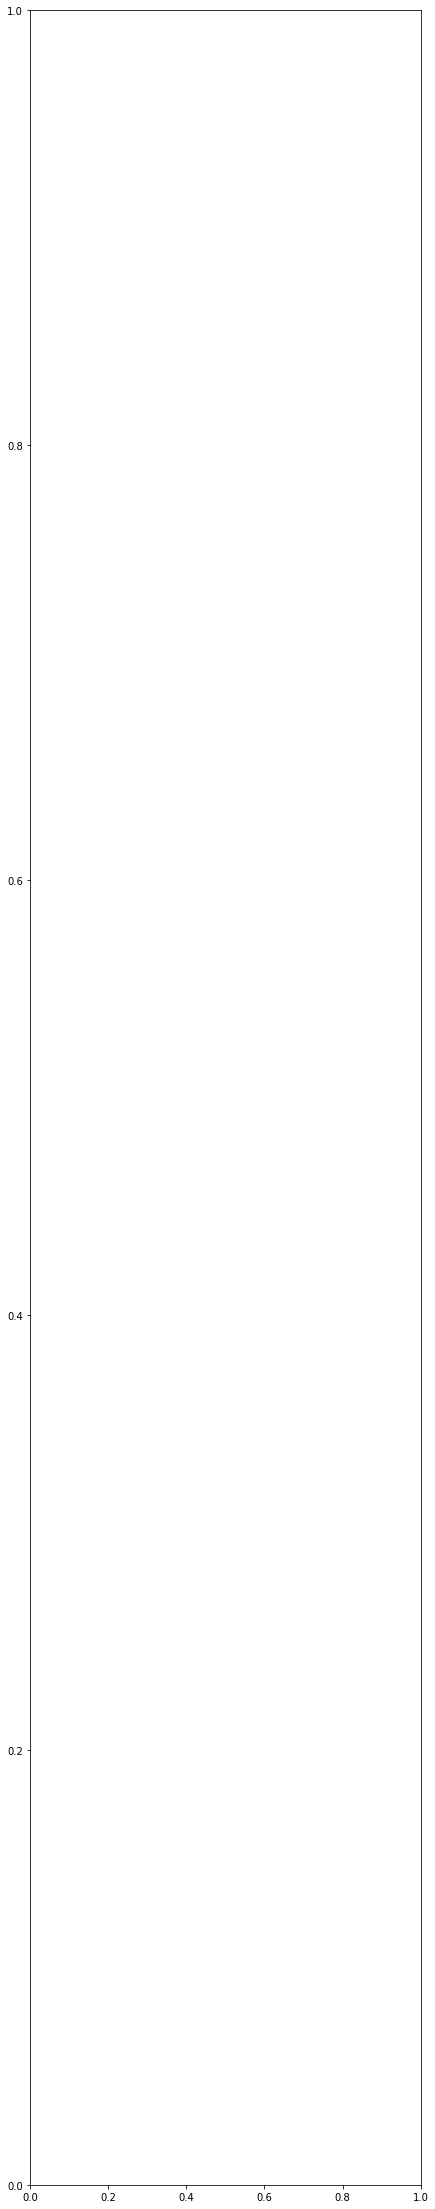

In [55]:
adv_results.to_csv("adv_results1.csv")
adv_results

adv_feat_stats.to_csv("adv_feat_stats1.csv")
adv_feat_stats

fig, ax = plt.subplots(figsize=(7,40))

sb.heatmap(adv_feat_stats.round(decimals=2), annot=True, cmap='YlOrRd', fmt='g')

plt.savefig("hmap_features_stats.eps", format="eps", bbox_inches='tight')
plt.show()

adv_inv.to_csv("./adv_inv")
adv_inv